# Protocollo OAuth
Una breve introduzione di cosa si va a parlare e degli strumenti che verranno utilizzati.



In [7]:
import requests
import os

os.environ['GCLOUD_PROJECT_ID']

'dev-openid-288208'

### Entita' di un protocollo di autorizzazione

* risorsa (immagini, video, chiavi della macchina)
* propietario della risorsa
* servizio terzo

### Problemi fornendo direttamente le propie credenziali al servizio

1. Il propietario della risorsa, per garantirne l'accesso a servizi terzi deve fornire le sue credenziali ad essi.
2. I servizi terzi ottenendo le credenziali hanno completo controllo sull'account dell'utente.
3. Il propietario puo' revocare l'accesso alla risorsa solamente cambiando le sue credenziali.
4. Non e' possibile revocare autorizzazione ad un solo servizio.

I problemi ovviamente non si pongono nel caso in cui il propietario delle risorse coincide con l'autore del servizio terzo.

## OAuth2.0
E' un protocollo utilizzato per garantire ad un client l'autorizzazione per le API di un server.

L'autorizzazione e' espressa attraverso un token, chiamato `access_token`, che deve essere contenuto
negli header delle richieste API.

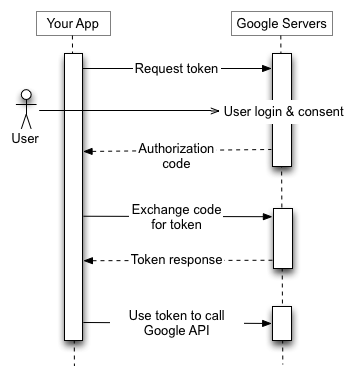

In [2]:
access_token = 'B0ASF99a0dsaf09v90as0'
headers = {
    'Authorization': 'Bearer ' + access_token
}
#response = requests.post('https://google.apis/example/email', headers=headers)

### Come ottenere un access token
1. client fa un redirect alla pagina di autorizzazione, specificando i permessi richiesti

In [5]:
from urllib.parse import quote

authorization_url = 'http://google.it'
response_type     = 'code'
client_id         = 'my_client_id'
redirect_uri      = quote('http://localhost:8000/after_redirect')
scope             = 'email,openid'
state             = '---'

params = '&'.join([
    f'{response_type=}', # Comportamento del server di autorizzazione
    f'{client_id=}',     # Identificativo dell'applicazione
    f'{redirect_uri=}',  # Dove far redirect una volta che il processo di autorizzazione e' terminato
    f'{scope=}',         # Autorizzazioni richieste
    f'{state=}',         # Stato che viene ritornato indietro al server
])
redirect_to = f'{authorization_url}?{params}'

In [4]:
redirect_to

"http://google.it?response_type='code'&client_id='my_client_id'&redirect_uri='http%3A//localhost%3A8000/after_redirect'&scope='email,openid'&state='---'"

## Diverse estensioni del protocollo:
* 